In [1]:
import pandas as pd
import textmining
import numpy as np
import lda
from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")
import matplotlib.pyplot as plt
%pylab inline

ImportError: No module named textmining

In [2]:
cd /users/nickroot/downloads

/Users/nickroot/Downloads


In [13]:
# Import the twitter detractors
Feedback = pd.read_csv("BayesModelPredictionsOnSTFeedback3_Negative.csv")


In [14]:
Comments = Feedback['CleanComments']

In [15]:
tdm = textmining.TermDocumentMatrix()

In [16]:
n = len(Comments)# tells you number of rows you need to loop through

In [17]:
counter = 0

In [18]:
for i in range(n):
    counter = counter + 1
    tdm.add_doc(Comments[i])

In [19]:
counter

1950

In [20]:
# create a temp variable with doc-term info
temp = list(tdm.rows(cutoff=1))
 
# get the vocab from first row (THIS IS ALL THE VOCAB)
vocab = tuple(temp[0])
 
# get document-term matrix from remaining rows
X = np.array(temp[1:])

In [21]:
print("type(X): {}".format(type(X)))
print("shape: {}".format(X.shape))
print("X:\n\n", X , "\n")

type(X): <type 'numpy.ndarray'>
shape: (1950, 3543)
('X:\n\n', array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), '\n')


In [35]:
model = lda.LDA(n_topics=8, n_iter=500, random_state=1)
model.fit(X)

<lda.lda.LDA instance at 0x11102fe18>

In [36]:
#From the fit model we can look at the topic-word probabilities:

In [37]:
topic_word = model.topic_word_
print("type(topic_word): {}".format(type(topic_word)))
print("shape: {}".format(topic_word.shape))


type(topic_word): <type 'numpy.ndarray'>
shape: (8, 3543)


In [38]:
# We can see that across the 3 topics there are 559 words used
# Lets check the probabiities add up to 100%

In [39]:
for n in range(3):
    sum_pr = sum(topic_word[n,:])
    print("topic: {} sum: {}".format(n, sum_pr))

topic: 0 sum: 1.0
topic: 1 sum: 1.0
topic: 2 sum: 1.0


In [40]:
#Lets have a look at the top words for each topic (by probability):

In [41]:
n = 15
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n+1):-1]
    print('*Topic {}\n- {}'.format(i, ' '.join(topic_words)))

*Topic 0
- i s it accounts m bank used statement good look lloyds ve d even think
*Topic 1
- old back like new much one change please layout better system format previous it t
*Topic 2
- new t find use pending like payments can banking direct debits internet see site layout
*Topic 3
- statement order statements page transactions date last would work one t view first search debits
*Topic 4
- log button customer out new page related cannot cant find site advisor click account website
*Topic 5
- t it can like s don change i something get fix site awful changes previous
*Topic 6
- account card credit see money new transfer find available cannot balance accounts online a c
*Topic 7
- screen see page much accounts information left account one like big new right space scroll


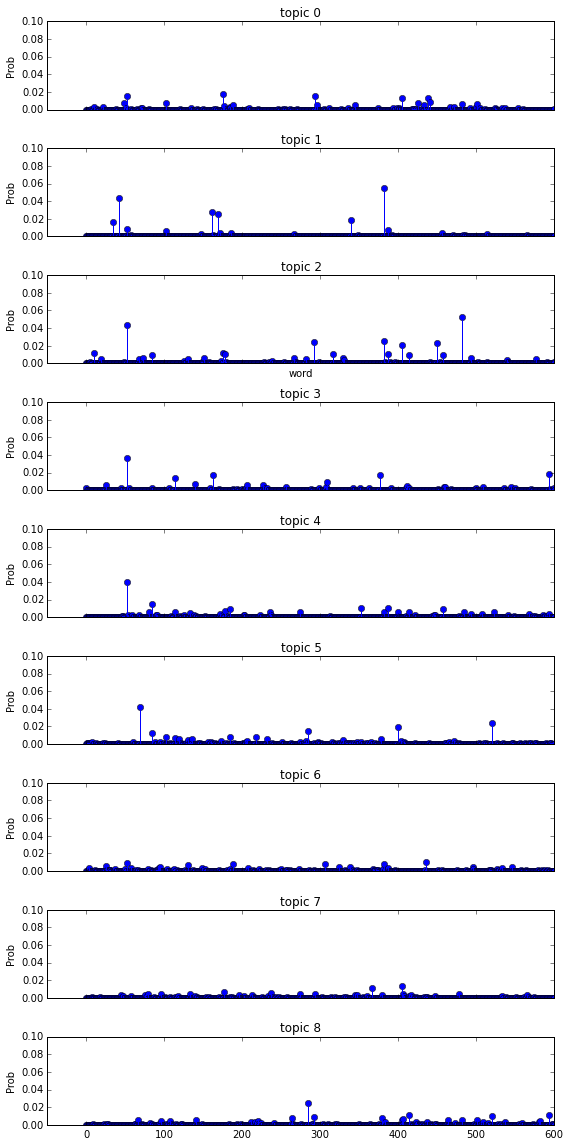

In [50]:
# lets check the topic-word distributions

f, ax= plt.subplots(9, 1, figsize=(8, 16), sharex=True)
for i, k in enumerate([0, 1, 2, 3, 4, 5, 6, 7, 8]):
    ax[i].stem(topic_word[k,:], linefmt='b-',
               markerfmt='bo', basefmt='w-')
    ax[i].set_xlim(-50,600)
    ax[i].set_ylim(0, 0.10)
    ax[i].set_ylabel("Prob")
    ax[i].set_title("topic {}".format(k))

ax[2].set_xlabel("word")

plt.tight_layout()
plt.show()

In [28]:
doc_topic = model.doc_topic_
print("type(doc_topic): {}".format(type(doc_topic)))
print("shape: {}".format(doc_topic.shape))



type(doc_topic): <type 'numpy.ndarray'>
shape: (94, 3)


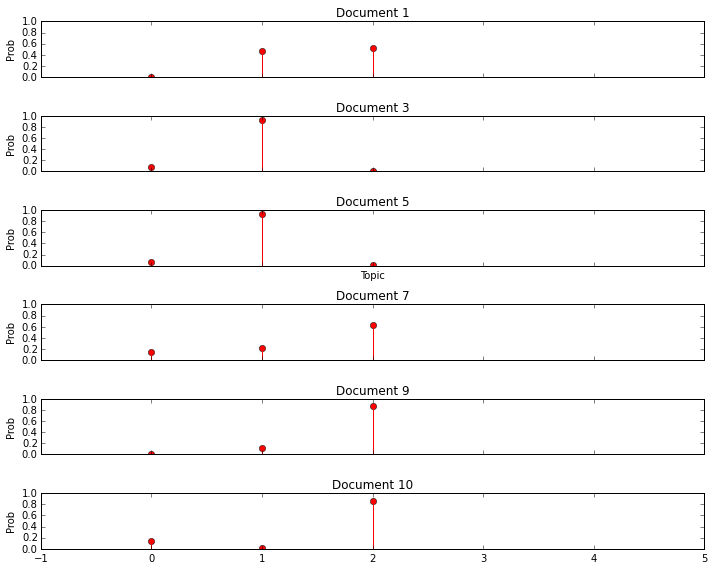

In [35]:
# lets look at the topic distribution for a few document
f, ax= plt.subplots(6, 1, figsize=(10, 8), sharex=True) # 8, 6 is the plot size
for i, k in enumerate([1, 3, 5, 7, 9, 10]):
    ax[i].stem(doc_topic[k,:], linefmt='r-',
               markerfmt='ro', basefmt='w-')
    ax[i].set_xlim(-1, 5)
    ax[i].set_ylim(0, 1)
    ax[i].set_ylabel("Prob")
    ax[i].set_title("Document {}".format(k))

ax[2].set_xlabel("Topic")

plt.tight_layout()
plt.show()